In [1]:
library(msigdbr)
library(clusterProfiler)
library(org.Hs.eg.db)
library(ggplot2)



clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, p

In [2]:
h_c2b <- msigdbr(species = "Homo sapiens", category = "C2", subcategory = 'CP:BIOCARTA') %>% 
  dplyr::select(gs_name, entrez_gene)

In [3]:
genes.c0 = read.table('/home/suyanchi/project/dab/results/case/marker.c0.txt')
gene = bitr(genes.c0[,1], fromType = 'SYMBOL', toType = c("ENSEMBL","ENTREZID"), OrgDb = 'org.Hs.eg.db')
em <- enricher(gene$ENTREZID, TERM2GENE=h_c2b)
write.table(em@result, file = '/home/suyanchi/project/dab/results/case/out/BI1.csv', sep = ',', col.names = NA)

genes.c1 = read.table('/home/suyanchi/project/dab/results/case/marker.c1.txt')
gene = bitr(genes.c1[,1], fromType = 'SYMBOL', toType = c("ENSEMBL","ENTREZID"), OrgDb = 'org.Hs.eg.db')
em <- enricher(gene$ENTREZID, TERM2GENE=h_c2b)
write.table(em@result, file = '/home/suyanchi/project/dab/results/case/out/BI2.csv', sep = ',', col.names = NA)

genes.c2 = read.table('/home/suyanchi/project/dab/results/case/marker.c2.txt')
gene = bitr(genes.c2[,1], fromType = 'SYMBOL', toType = c("ENSEMBL","ENTREZID"), OrgDb = 'org.Hs.eg.db')
em <- enricher(gene$ENTREZID, TERM2GENE=h_c2b)
write.table(em@result, file = '/home/suyanchi/project/dab/results/case/out/BI3.csv', sep = ',', col.names = NA)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(genes.c0[, 1], fromType = "SYMBOL", toType = c("ENSEMBL", :
“1.78% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(genes.c1[, 1], fromType = "SYMBOL", toType = c("ENSEMBL", :
“2.26% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(genes.c2[, 1], fromType = "SYMBOL", toType = c("ENSEMBL", :
“4% of input gene IDs are fail to map...”


In [4]:
pathway1 = read.table('/home/suyanchi/project/dab/results/case/out/BI1.csv', sep = ',', header = T, row.names = 1)
pathway2 = read.table('/home/suyanchi/project/dab/results/case/out/BI2.csv', sep = ',', header = T, row.names = 1)
pathway3 = read.table('/home/suyanchi/project/dab/results/case/out/BI3.csv', sep = ',', header = T, row.names = 1)

In [5]:
pw = c('BIOCARTA_TCYTOTOXIC_PATHWAY', 'BIOCARTA_TCRA_PATHWAY', 
       'BIOCARTA_TCR_PATHWAY', 'BIOCARTA_PPARA_PATHWAY', 'BIOCARTA_IL2RB_PATHWAY',
       'BIOCARTA_CTL_PATHWAY')

diff.Biocarta = data.frame(Biocarta=c(rep(c('BIOCARTA_TCYTOTOXIC_PATHWAY', 'BIOCARTA_TCRA_PATHWAY', 
                                      'BIOCARTA_TCR_PATHWAY', 'BIOCARTA_PPARA_PATHWAY', 'BIOCARTA_IL2RB_PATHWAY',
                                      'BIOCARTA_CTL_PATHWAY'), 3)),
                           Sample = c(rep('BI1', 6), rep('BI2', 6), rep('BI3', 6)))

pvalue = c(pathway1[pw, 'pvalue'], pathway2[pw, 'pvalue'], pathway3[pw, 'pvalue'])
pvalue[which(is.na(pvalue))]=0
pvalue

diff.Biocarta$pvalue = pvalue
write.table(diff.Biocarta, file = '/home/suyanchi/project/dab/results/case/out/all.csv', sep = ',', col.names = NA)

[1] 1.525131e-03 2.531385e-01 1.114528e-02 6.665453e-01 5.404157e-01
 [6] 3.005897e-06 1.452317e-02 1.148369e-03 4.707141e-04 7.995882e-03
[11] 1.926965e-02 1.888168e-01 1.191451e-03 2.180580e-05 1.874378e-01
[16] 0.000000e+00 0.000000e+00 5.888260e-02

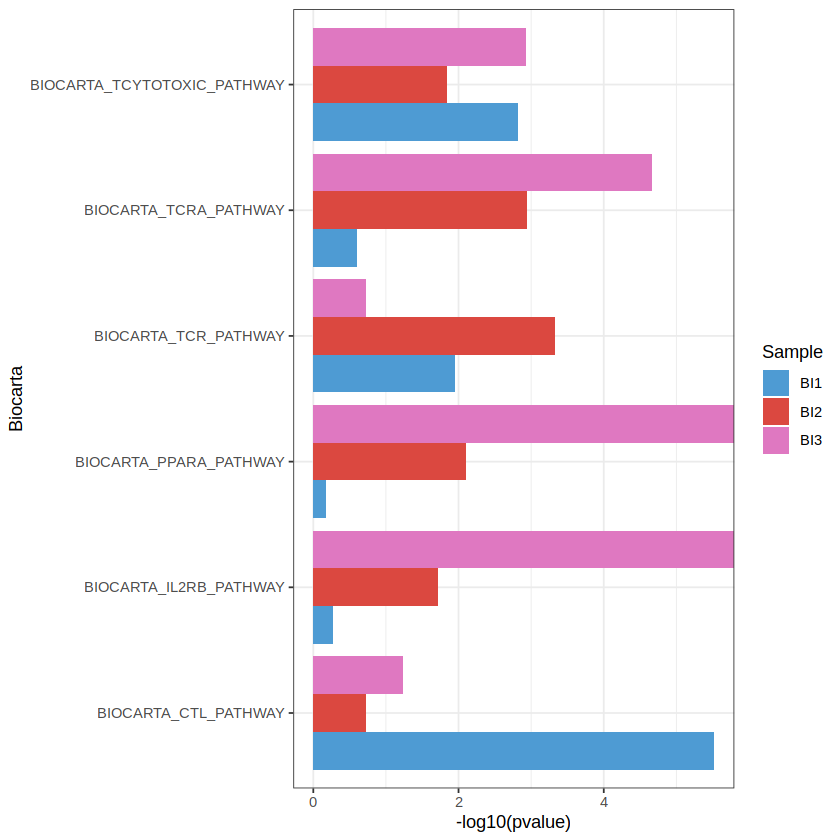

In [6]:
p.bioc <- ggplot(data = diff.Biocarta, aes(x=-log10(pvalue), y=Biocarta, fill=Sample)) +
  geom_bar(position = "dodge", stat = "identity") +
  theme_bw() +
  scale_fill_manual(values = c("#4E9BD3","#DB4840","#DF78C1"))
p.bioc


In [ ]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.diff.pathway.Biocarta.pdf",p.bioc,width = 5,height = 4)

In [12]:
# go and kegg term
Enrichment_KEGGgo_analusis <- function(genes,
                                       species=c('human','mouse')){
  library(org.Hs.eg.db) 
  library(clusterProfiler)
  
  if(species == 'human'){
    
    genes_df <- bitr(genes, 
                     fromType="SYMBOL", 
                     toType="ENTREZID", 
                     OrgDb="org.Hs.eg.db", 
                     drop = TRUE) 
    
    organism = "hsa"
    OrgDb = org.Hs.eg.db
  }
  
  if(species == 'mouse'){
    
    genes_df <- bitr(genes, 
                     fromType="SYMBOL", 
                     toType="ENTREZID", 
                     OrgDb="org.Mm.eg.db", 
                     drop = TRUE) 
    organism = "mmu"
    OrgDb = org.Mm.eg.db
  }
  
  
  colnames(genes_df) <- c("gene","EntrzID")
  
  
  
  
  
  # KEGG
  kegg.re <- enrichKEGG(gene = genes_df$EntrzID, 
                        organism  = organism, 
                        keyType = "kegg",
                        pAdjustMethod = "fdr",
                        pvalueCutoff = 0.05, 
                        qvalueCutoff = 0.05, 
                        minGSSize = 10,
                        maxGSSize = 500)
  
  if (is.null(kegg.re)) {} else {kegg.re <- setReadable(kegg.re, OrgDb = OrgDb, keyType="ENTREZID")}
  print("kegg Done")
  
  # GO
  go.re1 <- enrichGO(gene = genes_df$EntrzID, 
                     keyType = "ENTREZID", 
                     OrgDb= OrgDb, 
                     ont="BP", 
                     pAdjustMethod = "fdr", 
                     pvalueCutoff  = 0.05, 
                     qvalueCutoff  = 0.05, 
                     minGSSize = 10,
                     maxGSSize = 500, 
                     readable = TRUE); 
  print("GOBP Done")
  
  go.re2 <- enrichGO(gene = genes_df$EntrzID, 
                     keyType = "ENTREZID", 
                     OrgDb= OrgDb, 
                     ont="CC", 
                     pAdjustMethod = "fdr", 
                     pvalueCutoff  = 0.05, 
                     qvalueCutoff  = 0.05, 
                     minGSSize = 10, 
                     maxGSSize = 500, 
                     readable = TRUE); 
  print("GOCC Done")
  
  go.re3 <- enrichGO(gene = genes_df$EntrzID, 
                     keyType = "ENTREZID", 
                     OrgDb= OrgDb, 
                     ont="MF", 
                     pAdjustMethod = "fdr",
                     pvalueCutoff  = 0.05, 
                     qvalueCutoff  = 0.05, 
                     minGSSize = 10, 
                     maxGSSize = 500, 
                     readable = TRUE); 
  print("GOMF Done")

  go.re4 <- enrichGO(gene = genes_df$EntrzID, 
                     keyType = "ENTREZID", 
                     OrgDb= OrgDb, 
                     ont="ALL", 
                     pAdjustMethod = "fdr",
                     pvalueCutoff  = 0.05, 
                     qvalueCutoff  = 0.05, 
                     minGSSize = 10, 
                     maxGSSize = 500, 
                     readable = TRUE); 
  print("GO ALL Done")
  

  enrich_list <- list(kegg.re, go.re1, go.re2, go.re3, go.re4)
  names(enrich_list) <- c("KEGG","GO_BP","GO_CC","GO_MF", "GO_ALL")
  return(enrich_list)
}

In [13]:
# cluster 0
genes.c0 = read.table('/home/suyanchi/project/dab/results/case/marker.c0.txt')
results0 <- Enrichment_KEGGgo_analusis(genes = genes.c0[,1], species = "human")
results0

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db", :
“1.78% of input gene IDs are fail to map...”


[1] "kegg Done"
[1] "GOBP Done"
[1] "GOCC Done"
[1] "GOMF Done"
[1] "GO ALL Done"


$KEGG
#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:166] "10417" "4818" "60" "5216" "9168" "5551" "83888" "6275" "1072" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...51 enriched terms found
'data.frame':	51 obs. of  9 variables:
 $ ID         : chr  "hsa04650" "hsa04810" "hsa04670" "hsa04611" ...
 $ Description: chr  "Natural killer cell mediated cytotoxicity" "Regulation of actin cytoskeleton" "Leukocyte transendothelial migration" "Platelet activation" ...
 $ GeneRatio  : chr  "15/103" "18/103" "13/103" "12/103" ...
 $ BgRatio    : chr  "132/8579" "229/8579" "115/8579" "124/8579" ...
 $ pvalue     : num  3.72e-11 1.78e-10 8.84e-10 2.45e-08 2.51e-08 ...
 $ p.adjust   : num  8.33e-09 2.00e-08 6.60e-08 1.13e-06 1.13e-06 ...
 $ qvalue     : num  5.80e-09 1.39e-08 4.59e-08 7.83e-07 7.83e-07 ...
 $ geneID     : chr  "PRF1/HLA-B/GZMB/FCGR3A/ITGB2/CD247/RAC2/FCER1G/KIR2DL3/MAPK1/NCR3/LAT2/RAC1/ITGAL/KIR3DL2" "

In [14]:
# cluster 1
genes.c1 = read.table('/home/suyanchi/project/dab/results/case/marker.c1.txt')
results1 <- Enrichment_KEGGgo_analusis(genes = genes.c1[,1], species = "human")
results1

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db", :
“1.5% of input gene IDs are fail to map...”


[1] "kegg Done"
[1] "GOBP Done"
[1] "GOCC Done"
[1] "GOMF Done"
[1] "GO ALL Done"


$KEGG
#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:131] "3003" "1915" "6187" "6137" "23521" "6210" "6375" "6232" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...15 enriched terms found
'data.frame':	15 obs. of  9 variables:
 $ ID         : chr  "hsa03010" "hsa05171" "hsa05140" "hsa04658" ...
 $ Description: chr  "Ribosome" "Coronavirus disease - COVID-19" "Leishmaniasis" "Th1 and Th2 cell differentiation" ...
 $ GeneRatio  : chr  "68/108" "72/108" "7/108" "7/108" ...
 $ BgRatio    : chr  "167/8579" "232/8579" "77/8579" "92/8579" ...
 $ pvalue     : num  2.91e-94 2.18e-90 4.80e-05 1.50e-04 4.05e-04 ...
 $ p.adjust   : num  5.24e-92 1.96e-88 2.88e-03 6.75e-03 1.28e-02 ...
 $ qvalue     : num  4.45e-92 1.67e-88 2.44e-03 5.72e-03 1.08e-02 ...
 $ geneID     : chr  "RPS2/RPL13/RPL13A/RPS15A/RPS27/RPS12/RPS29/RPL34/RPS6/RPS28/RPL41/RPL10/RPS14/RPL3/RPLP2/RPL32/RPS23/RPS18/RPL2"| __truncated__ "RPS2/RPL13/RPL13A/

In [15]:
# cluster 2
genes.c2 = read.table('/home/suyanchi/project/dab/results/case/marker.c2.txt')
results2 <- Enrichment_KEGGgo_analusis(genes = genes.c2[,1], species = "human")
results2

'select()' returned 1:1 mapping between keys and columns



[1] "kegg Done"
[1] "GOBP Done"
[1] "GOCC Done"
[1] "GOMF Done"
[1] "GO ALL Done"


$KEGG
#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:25] "6352" "3821" "6223" "3127" "1043" "101929531" "2999" "6231" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...26 enriched terms found
'data.frame':	26 obs. of  9 variables:
 $ ID         : chr  "hsa05332" "hsa04640" "hsa04514" "hsa05140" ...
 $ Description: chr  "Graft-versus-host disease" "Hematopoietic cell lineage" "Cell adhesion molecules" "Leishmaniasis" ...
 $ GeneRatio  : chr  "5/12" "6/12" "6/12" "5/12" ...
 $ BgRatio    : chr  "42/8579" "99/8579" "158/8579" "77/8579" ...
 $ pvalue     : num  1.70e-09 1.77e-09 2.99e-08 3.85e-08 4.11e-08 ...
 $ p.adjust   : num  5.58e-08 5.58e-08 5.18e-07 5.18e-07 5.18e-07 ...
 $ qvalue     : num  3.36e-08 3.36e-08 3.12e-07 3.12e-07 3.12e-07 ...
 $ geneID     : chr  "KLRC1/HLA-DRB5/HLA-DPB1/HLA-DPA1/HLA-DRB1" "HLA-DRB5/HLA-DPB1/CD3E/HLA-DPA1/CD2/HLA-DRB1" "HLA-DRB5/HLA-DPB1/HLA-DPA1/ITGB1/CD2/HLA-DRB1" "HLA-DRB5

In [16]:
save(file = '/home/suyanchi/project/dab/results/case/rds/ea.RData', results0,results1,results2)